In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.style.use('ggplot')

In [16]:
from faker import Faker
fake = Faker()
Faker.seed(4321)

names_list = []
fake = Faker()
for _ in range(100):
  names_list.append(fake.name())
np.random.seed(7)

salaries = []
for _ in range(100):
    salary = np.random.randint(1000,2500)
    salaries.append(salary)

salary_df = pd.DataFrame(
    {'Person': names_list,
     'Salary (in USD)': salaries
    })

In [18]:
salary_df.head()

,Person,Salary (in USD)
0,Jason Brown,1175
1,Jacob Stein,2220
2,Cody Brown,1537
3,Larry Morales,1502
4,Jessica Hendricks,1211


In [19]:
salary_df.at[16, 'Salary (in USD)'] = 23
salary_df.at[65, 'Salary (in USD)'] = 17

print(salary_df.loc[16])
print(salary_df.loc[65])

Person             Miss Amanda Harris MD
Salary (in USD)                       23
Name: 16, dtype: object
Person             Joyce Bishop
Salary (in USD)              17
Name: 65, dtype: object


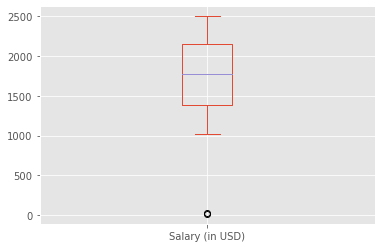

In [20]:
salary_df['Salary (in USD)'].plot(kind='box')
plt.show()

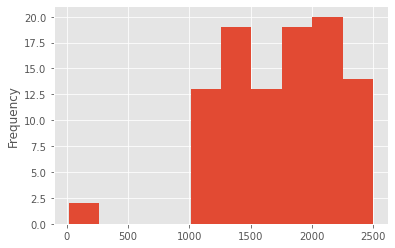

In [21]:
salary_df['Salary (in USD)'].plot(kind='hist')
plt.show()

In [22]:
print('Minimum salary ' + str(salary_df['Salary (in USD)'].min()))
print('Maximum salary ' + str(salary_df['Salary (in USD)'].max()))

Minimum salary 17
Maximum salary 2498


In [23]:
salary_raw = salary_df['Salary (in USD)'].values
salary_raw = salary_raw.reshape(-1, 1)
salary_raw = salary_raw.astype('float64')

In [50]:
from scipy.cluster.vq import kmeans
from scipy.cluster.vq import vq
codebook, distortion = kmeans(salary_raw, 4)

In [51]:
groups, cdist = vq(salary_raw, codebook)

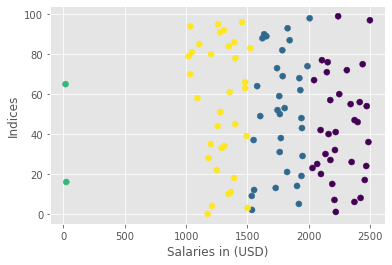

In [52]:
plt.scatter(salary_raw, np.arange(0,100), c=groups)
plt.xlabel('Salaries in (USD)')
plt.ylabel('Indices')
plt.show()

In [53]:
salary_df['class'] = 0
salary_df.at[16, 'class'] = 1
salary_df.at[65, 'class'] = 1
salary_df.loc[16]

Person             Miss Amanda Harris MD
Salary (in USD)                       23
class                                  1
Name: 16, dtype: object

In [54]:
salary_df.head()

,Person,Salary (in USD),class
0,Jason Brown,1175,0
1,Jacob Stein,2220,0
2,Cody Brown,1537,0
3,Larry Morales,1502,0
4,Jessica Hendricks,1211,0


In [55]:
from pyod.models.knn import KNN

In [56]:
X = salary_df['Salary (in USD)'].values.reshape(-1,1)
y = salary_df['class'].values

In [59]:
clf = KNN(contamination=0.02, n_neighbors=5)
clf.fit(X)

KNN(algorithm='auto', contamination=0.02, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2,
  radius=1.0)

In [60]:
y_train_pred = clf.labels_
y_train_scores = clf.decision_scores_  

In [61]:
from pyod.utils import evaluate_print
evaluate_print('KNN', y, y_train_scores)

KNN ROC:1.0, precision @ rank n:1.0


In [62]:
X_test = np.array([[37.]])
clf.predict(X_test)

array([1])

In [63]:
X_test_abnormal = np.array([[1256.]])
clf.predict(X_test_abnormal)

array([0])